In [17]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
import tables as tb

def merge(a,b):
    final = np.zeros (len(a)+len(b))
    for i in range(len(a)):
        final[2*i]   = a[i]
        final[2*i+1] = b[i]
    return final

def read_iso_m_h5(db_file, iso_list, step):
    db = tb.open_file(db_file, mode='r')
    fuel_bef_mat = db.root.materials.fuel.before_reproc.parameters
    fuel_bef = db.root.materials.fuel.before_reproc.comp
    isomap = fuel_bef.attrs.iso_map

    fuel_after_mat = db.root.materials.fuel.after_reproc.parameters
    fuel_after = db.root.materials.fuel.after_reproc.comp

    mass_b = np.array([x['mass'] for x in fuel_bef_mat.iterrows()])
    vol_b = np.array([x['volume'] for x in fuel_bef_mat.iterrows()])
    dens_b = np.array([x['density'] for x in fuel_bef_mat.iterrows()])

    mass_a = np.array([x['mass'] for x in fuel_after_mat.iterrows()])
    vol_a = np.array([x['volume'] for x in fuel_after_mat.iterrows()])
    dens_a = np.array([x['density'] for x in fuel_after_mat.iterrows()])
    days_b = np.array(step*np.arange(len(mass_b)))
    days_a = np.arange(step, (len(mass_a)+1)*(step), step, dtype=np.float64)

    mass_b = {}
    mass_a = {}
    for iso in iso_list:
        mass_b[iso] = 1e-6*np.array([row[isomap[iso]] for row in fuel_bef])
        mass_a[iso] = 1e-6*np.array([row1[isomap[iso]] for row1 in fuel_after])
    db.close()
    return mass_b, mass_a, days_b # mass in tonnes

<IPython.core.display.Javascript object>


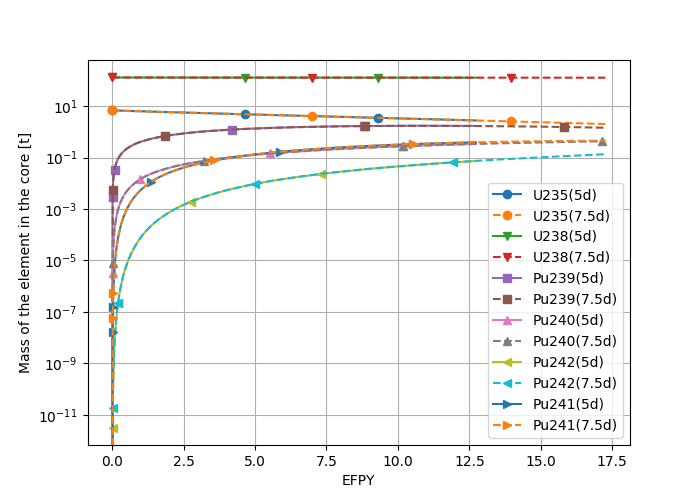

Xe135 before/after 0.000023, 0.000000


In [18]:
import itertools
markers=itertools.cycle(('o','v','s','^','<','>','p','P','*','h','H','+','x','X','D','d','|','_'))

iso_list = ['Xe135', 'Kr83', 'I135','U235', 'U236', 'U238', 'Pu238','Pu239', 'Pu240', 'Pu241', 'Pu242', 'Am241', 'Am242']
#plot_iso = ['U235', 'U236', 'U238','Pu239', 'Pu240', 'Pu242', 'Pu241']
plot_iso = ['U235', 'U238', 'Pu239', 'Pu240', 'Pu242', 'Pu241']


db_file_5d = '/home/andrei2/Desktop/git/saltproc/develop/saltproc/data/db_saltproc.h5'
step_5 = 5/365  # days/year

db_file_7_5d = '/home/andrei2/Desktop/git/meitner-task-2/saltproc_results/time_step_refinement/5leu_geo_swch/7_5d_840_steps.h5'
step_7_5 = 7.5/365  # days/year


mass_before_5, mass_after_5, t_5 = read_iso_m_h5(db_file_5d, iso_list, step_5)
mass_before_7_5, mass_after_7_5, t_7_5 = read_iso_m_h5(db_file_7_5d, iso_list, step_7_5)

# Initialize figure
fig_1 = matplotlib.pyplot.figure(1, figsize=[7,5])
ax = fig_1.add_subplot(111)
ax.grid(True)
eps = {'Xe135':0.988, 'I135':0.05}

for i in plot_iso:
    m=next(markers)
    ax.semilogy(t_5, mass_before_5[i], '-',marker=m, markevery=0.2, label=str(i)+"(5d)")
    ax.semilogy(t_7_5, mass_before_7_5[i], '--',marker=m, markevery=0.3, label=str(i)+"(7.5d)")
ax.legend(loc=0)
#ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.set_ylabel('Mass of the element in the core [t]')
ax.set_xlabel('EFPY')
#ax.set_title('Multiplication factor for online reprocessing case ' + str(EOS) +' days')
#ax.set_xlim(0, 13)
#ax.set_ylim(2e-1, 3e+1)
#ax.set_ylim(2e-1, 7.5e+4)
fig_1.show()

#fig_1.savefig('/home/andrei2/Desktop/git/meitner-task-2/doc/2019-06-q4-report/figures/u_pu_mass.png',bbox_inches='tight', dpi=700)
#xe_step_removal = (mass_b['Xe135'][1:] - mass_a['Xe135'])/mass_b['Xe135'][1:]
#i_step_removal = (mass_b['I135'][1:] - mass_a['I135'])/mass_b['I135'][1:]
# print("Xe-135 removal efficiency ", xe_step_removal)
# print("I-135 removal efficiency ", i_step_removal)
#print('U238 dynamics %f, %f' %(1e-6*mass_a['U238'][0],1e-6*mass_a['U238'][-1]))
print('Xe135 before/after %f, %f' %(mass_before_5['Xe135'][-1],mass_after_5['Xe135'][-1]))

<IPython.core.display.Javascript object>


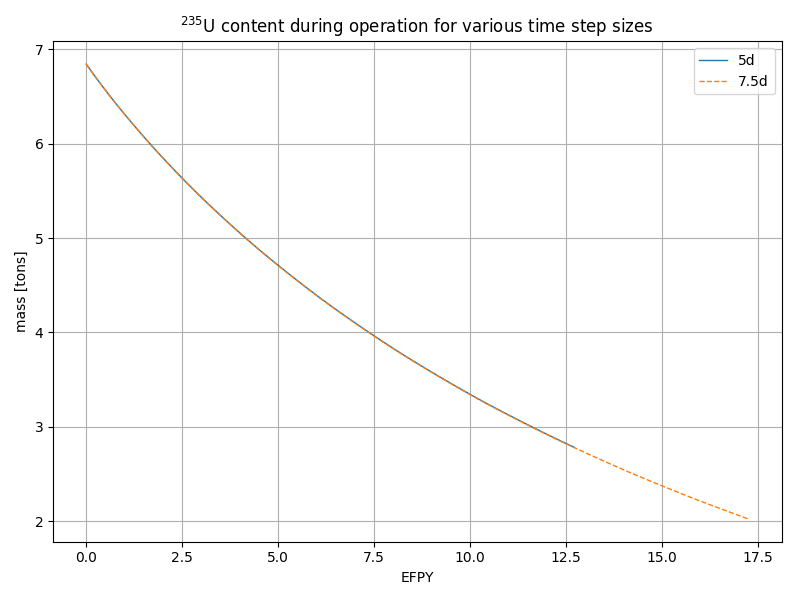

In [23]:
#print(t_5[:5], t_7_5[:4]/1.5)
#print(len(t_5), len(t_7_5))
# Initialize figure
fig_u235_mass = matplotlib.pyplot.figure(2, figsize=[8,6])
ax1 = fig_u235_mass.subplots()
ax1.grid(True)
ax1.plot(t_5, mass_before_5['U235'], '-', label='5d', linewidth=1.0) # at BDS (feed LEU 19.79%)
ax1.plot(t_7_5, mass_before_7_5['U235'], '--', label='7.5d', linewidth=1.0) # at BDS (feed LEU 19.79%)
ax1.legend(loc=0)
ax1.set_ylabel(r'mass [tons]')
ax1.set_xlabel('EFPY')
ax1.set_title(r'$^{235}$U content during operation for various time step sizes')
#ax1.set_xlim(12,12.25)
#ax1.set_xlim(0,13)
#ax1.set_ylim([2.85, 2.93])

#ax2 = ax1.twinx()
#ax2.set_prop_cycle(color=colors[1:])
#ax2.set_ylabel(r'$\Delta k$ from $\Delta t = 5d$ [%]')
#ax2.plot(days_7_5d[:-15], 1e+5*(k_bds_2_5d[::3] - k_bds_7_5d[:-15]), '--', label='7.5d', linewidth=0.7)
#ax2.plot(days_15d[:-69], 1e+5*(k_bds_2_5d[::6] - k_bds_15d[:-69]), '--', label='15d', linewidth=0.7)
#ax2.plot(days_30d[:-11], 1e+5*(k_bds_2_5d[::12] - k_bds_30d[:-11]), '--', label='30d', linewidth=0.7)
#ax2.legend(loc=1)
#ax2.set_ylim(-10, 2000)

fig_u235_mass.tight_layout()
fig_u235_mass.show()

#print(mass_before_5['U236'])
#print(mass_before_7_5['U236'])